In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')


from matplotlib import font_manager, rc # 폰트 세팅을 위한 모듈 추가
font_path = "C:/Windows/Fonts/malgun.ttf" # 사용할 폰트명 경로 삽입
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

In [3]:
chardatajeju_df = pd.read_excel('서울20년1월부터12월.xlsx')
chardatajeju_df

,Unnamed: 0,본부,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,시,구,도로명주소
0,0,서울,마포용산,용산역 아이파크몰,급속04,723,"서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)",급속,50.0,22.31,0,34,2020-01-01,2020-01-01 21:33:00,2020-01-01 22:07:00,서울특별시,용산구,"한강대로23길 55 (한강로3가, 용산역)"
1,13,남서울,구로금천,신구로자이 아파트,완속02,2324,서울특별시 구로구 구로동 501,완속,7.0,1.20,0,29,2020-01-01,2020-01-01 23:19:00,2020-01-01 23:49:00,서울특별시,구로구,구로동 501
2,15,남서울,강동송파,송파파인타운6단지 아파트,완속01,1739,서울특별시 송파구 충민로6길 14,완속,7.0,4.17,1,13,2020-01-01,2020-01-01 21:06:00,2020-01-01 22:20:00,서울특별시,송파구,충민로6길 14
3,16,남서울,강서양천,서울에너지공사 주차장,급속01,6762,서울특별시 양천구 목동 900,급속,50.0,48.45,1,8,2020-01-01,2020-01-01 21:12:00,2020-01-01 22:20:00,서울특별시,양천구,목동 900
4,20,남서울,강남,강남한신휴플러스6단지 아파트,급속01,1759,서울특별시 강남구 율현동 밤고개로26길 50,급속,50.0,35.97,1,7,2020-01-01,2020-01-01 21:20:00,2020-01-01 22:27:00,서울특별시,강남구,율현동 밤고개로26길 50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273738,2056614,서울,마포용산,마포래미안푸르지오 1단지,완속03,6254,서울특별시 마포구 아현동 마포대로 195,완속,7.0,22.99,3,54,2020-12-03,2020-12-02 20:53,2020-12-03 0:48,서울특별시,마포구,아현동 마포대로 195
273739,2056619,남서울,강동송파,홈플러스 강동점,급속01,5893,서울특별시 강동구 양재대로 1571,급속,50.0,14.96,0,21,2020-12-03,2020-12-02 23:39,2020-12-03 0:00,서울특별시,강동구,양재대로 1571
273740,2056621,서울,마포용산,마포래미안푸르지오 4단지,완속03,6267,서울특별시 마포구 아현동 마포대로 195,완속,7.0,9.89,1,57,2020-12-03,2020-12-02 22:06,2020-12-03 0:03,서울특별시,마포구,아현동 마포대로 195
273741,2056629,서울,광진성동,구의삼성쉐르빌아파트,완속01,9916,"서울특별시 광진구 구의강변로 106 (구의동, 구의동삼성쉐르빌)",완속,7.0,32.93,10,34,2020-12-03,2020-12-02 22:37,2020-12-03 9:12,서울특별시,광진구,"구의강변로 106 (구의동, 구의동삼성쉐르빌)"


In [4]:
chardatajeju20_df = chardatajeju_df.loc[:, ['본부', '사업소', '충전소명', '충전기', '주소', '충전기구분', '충전용량', '구']]

In [30]:
# chardatajeju20_df = chardatajeju20_df.drop_duplicates()
chardatajeju20_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,구
0,서울,마포용산,용산역 아이파크몰,급속04,"서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)",급속,50.0,용산구
1,남서울,구로금천,신구로자이 아파트,완속02,서울특별시 구로구 구로동 501,완속,7.0,구로구
2,남서울,강동송파,송파파인타운6단지 아파트,완속01,서울특별시 송파구 충민로6길 14,완속,7.0,송파구
3,남서울,강서양천,서울에너지공사 주차장,급속01,서울특별시 양천구 목동 900,급속,50.0,양천구
4,남서울,강남,강남한신휴플러스6단지 아파트,급속01,서울특별시 강남구 율현동 밤고개로26길 50,급속,50.0,강남구
...,...,...,...,...,...,...,...,...
266308,환경부,환경부,올림픽공원,급속01,서울특별시 송파구 올림픽로 424,급속,NaN,송파구
267700,환경부,환경부,목4동주민센터,급속01,서울특별시 양천구 목동중앙로 25,급속,NaN,양천구
268028,환경부,환경부,압구정 428 공영주차장1,급속01,서울특별시 강남구 압구정로 161,급속,NaN,강남구
269480,환경부,환경부,국회의원회관,급속02,"서울특별시 영등포구 의사당대로1, 국회의원회관 주차장 우측",급속,NaN,영등포구


In [6]:
print(chardatajeju20_df['구'].value_counts())

강남구     31623
송파구     31268
마포구     21217
서초구     19869
용산구     18552
강동구     12960
광진구     12353
도봉구     12133
노원구     10680
강서구     10176
양천구      9866
중구       9418
영등포구     9214
구로구      8478
성북구      8297
성동구      7396
동작구      5855
동대문구     5318
중랑구      5197
종로구      5108
금천구      3840
강북구      3546
은평구      3517
관악구      3309
서대문구     3033
Name: 구, dtype: int64


In [7]:
chardatajeju20_df['구'].sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0         용산구
1         구로구
2         송파구
3         양천구
4         강남구
         ... 
273738    마포구
273739    강동구
273740    마포구
273741    광진구
273742    강남구
Name: 구, Length: 273743, dtype: object>

In [8]:
# 2020년 제주도 구별 충전소 가동률
np.round(chardatajeju20_df['구'].value_counts().div(1621),2)

강남구     19.51
송파구     19.29
마포구     13.09
서초구     12.26
용산구     11.44
강동구      8.00
광진구      7.62
도봉구      7.48
노원구      6.59
강서구      6.28
양천구      6.09
중구       5.81
영등포구     5.68
구로구      5.23
성북구      5.12
성동구      4.56
동작구      3.61
동대문구     3.28
중랑구      3.21
종로구      3.15
금천구      2.37
강북구      2.19
은평구      2.17
관악구      2.04
서대문구     1.87
Name: 구, dtype: float64

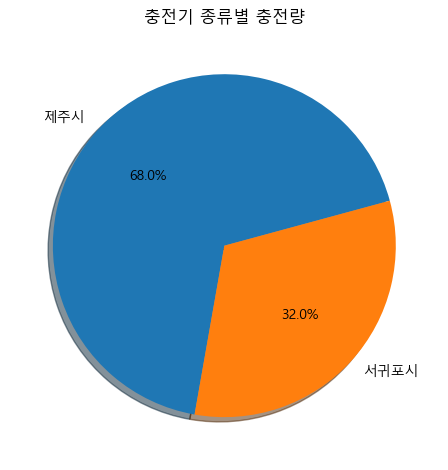

In [9]:
# 2020년 전기차 충전소 가동비율 그래프
ratio = [68,32]
labels = ['제주시', '서귀포시']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, shadow=True)
plt.title('충전기 종류별 충전량')
plt.tight_layout()
plt.show()

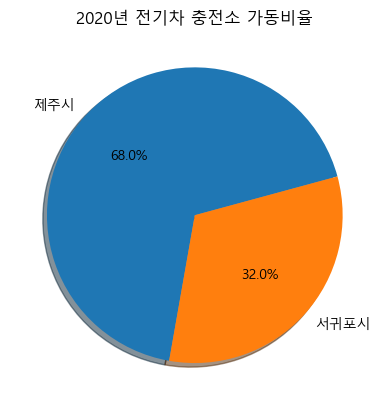

In [10]:
import matplotlib.pyplot as plt

ratio = [68,32]
labels = ['제주시', '서귀포시']
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, shadow=True)
plt.title('2020년 전기차 충전소 가동비율')
plt.show()


In [31]:
# 2020년 제주도 전기차 충전소 급속, 완속 충전기합
print(chardatajeju20_df['충전기구분'].value_counts())

완속    972
급속    649
Name: 충전기구분, dtype: int64


Text(0, 0.5, '충전기구분(급속/완속)')

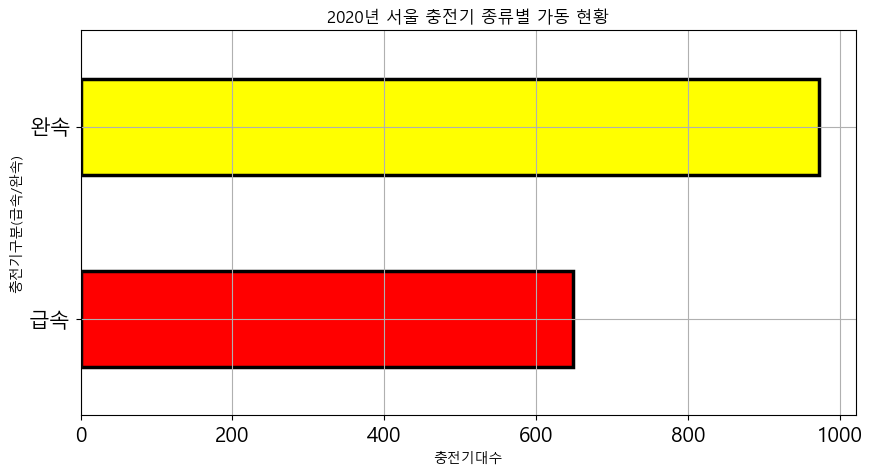

In [32]:
# 20년도 충전기 대수 가동 현황 총합 (완속, 급속)

chargerjeju20dist = pd.value_counts(chardatajeju20_df['충전기구분'].values, sort=True, ascending = True)
chargerjeju20dist.plot.barh()
chargerjeju20dist.plot.barh(grid=True, color = ['red', 'yellow'], edgecolor = 'black', linewidth = 2.5, figsize=(10,5), fontsize=15)
plt.title('2020년 서울 충전기 종류별 가동 현황')
plt.xlabel('충전기대수')
plt.ylabel('충전기구분(급속/완속)')

In [13]:
# 2020년도 제주도 자치구별, 충전기구분별 데이터 프레임을 추출합니다.

chargerjeju20_df = chardatajeju20_df[['구', '충전기구분']]
chargerjeju20_df = chargerjeju20_df.groupby(["구", "충전기구분"]).size()
pd.DataFrame(chargerjeju20_df)

0
구    충전기구분       
강남구  급속     12121
     완속     19502
강동구  급속      6693
     완속      6267
강북구  급속      2254
     완속      1292
강서구  급속      3993
     완속      6183
관악구  급속      2057
     완속      1252
광진구  급속      8884
     완속      3469
구로구  급속      4445
     완속      4033
금천구  급속      3299
     완속       541
노원구  급속      4863
     완속      5817
도봉구  급속      8330
     완속      3803
동대문구 급속      2536
     완속      2782
동작구  급속      1954
     완속      3901
마포구  급속     10628
     완속     10589
서대문구 급속      1051
     완속      1982
서초구  급속      6880
     완속     12989
성동구  급속      2595
     완속      4801
성북구  급속      3576
     완속      4721
송파구  급속     15578
     완속     15690
양천구  급속      5581
     완속      4285
영등포구 급속      4446
     완속      4768
용산구  급속      8231
     완속     10321
은평구  급속      3041
     완속       476
종로구  급속      2089
     완속      3019
중구   급속      7382
     완속      2036
중랑구  급속      2301
     완속      2896

Text(0, 0.5, '충전기대수')

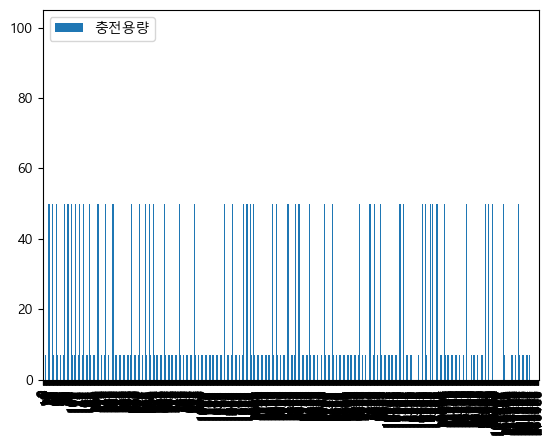

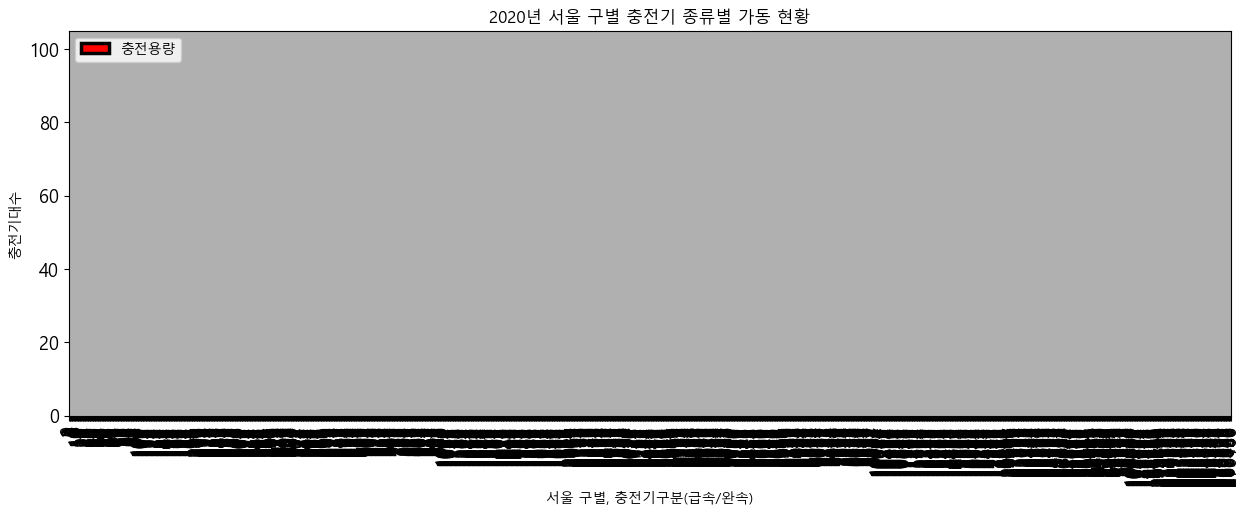

In [28]:
# 2020년도 제주도 자치구별 충전기 가동 현황을  시각화합니다. (구, 급속, 완속)

chardatajeju20_df.plot.bar()
chardatajeju20_df.plot.bar(grid=True, color = ['red', 'yellow'], edgecolor = 'black', linewidth = 2.5, figsize=(15,5), fontsize=13)
plt.xticks(rotation = 90)
plt.title('2020년 서울 구별 충전기 종류별 가동 현황')
plt.xlabel('서울 구별, 충전기구분(급속/완속)')
plt.ylabel('충전기대수')

In [15]:
# 202년도 전기차충전소 사용빈도(제주시/서귀포시)
print(chardatajeju_df['구'].value_counts())

강남구     31623
송파구     31268
마포구     21217
서초구     19869
용산구     18552
강동구     12960
광진구     12353
도봉구     12133
노원구     10680
강서구     10176
양천구      9866
중구       9418
영등포구     9214
구로구      8478
성북구      8297
성동구      7396
동작구      5855
동대문구     5318
중랑구      5197
종로구      5108
금천구      3840
강북구      3546
은평구      3517
관악구      3309
서대문구     3033
Name: 구, dtype: int64


Text(0, 0.5, '서울 구별')

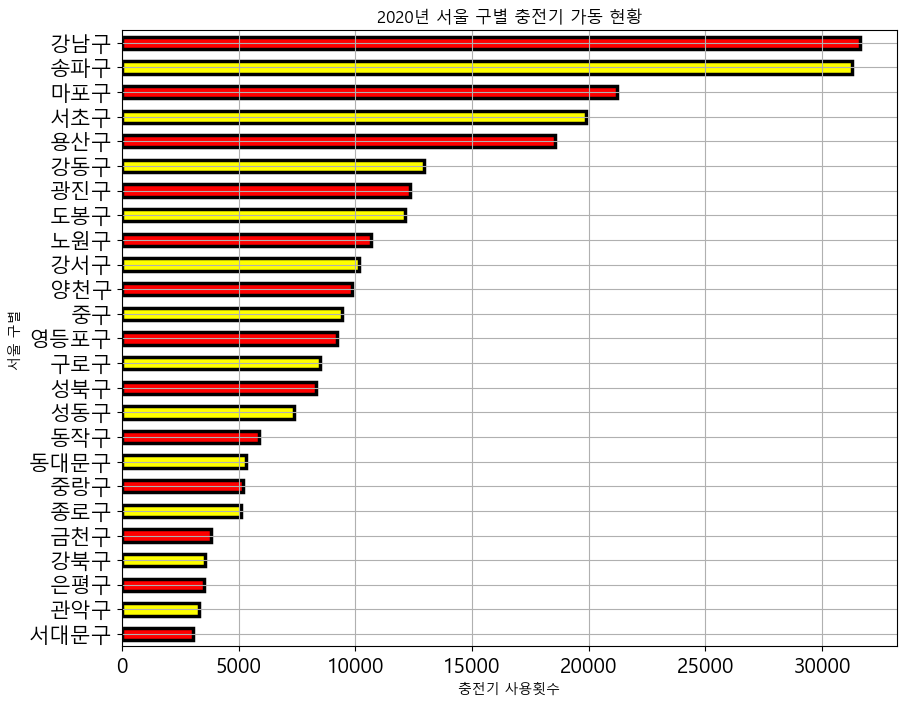

In [22]:
# 2020년도 제주도 전기차 충전소 사용 빈도 시각화

chargecountjeju20_df = pd.value_counts(chardatajeju_df['구'].values, sort=True, ascending = True)
chargecountjeju20_df.plot.barh()
chargecountjeju20_df.plot.barh(grid=True, color = ['red', 'yellow'], edgecolor = 'black', linewidth = 2.5, figsize=(10,8), fontsize=15)
plt.title('2020년 서울 구별 충전기 가동 현황')
plt.xlabel('충전기 사용횟수')
plt.ylabel('서울 구별')

In [17]:
# 2020년도 전기차충전소 사용빈도(급속/완속)
print(chardatajeju_df['충전기구분'].value_counts())

완속    138935
급속    134808
Name: 충전기구분, dtype: int64


Text(0, 0.5, '충전기구분(급속/완속)')

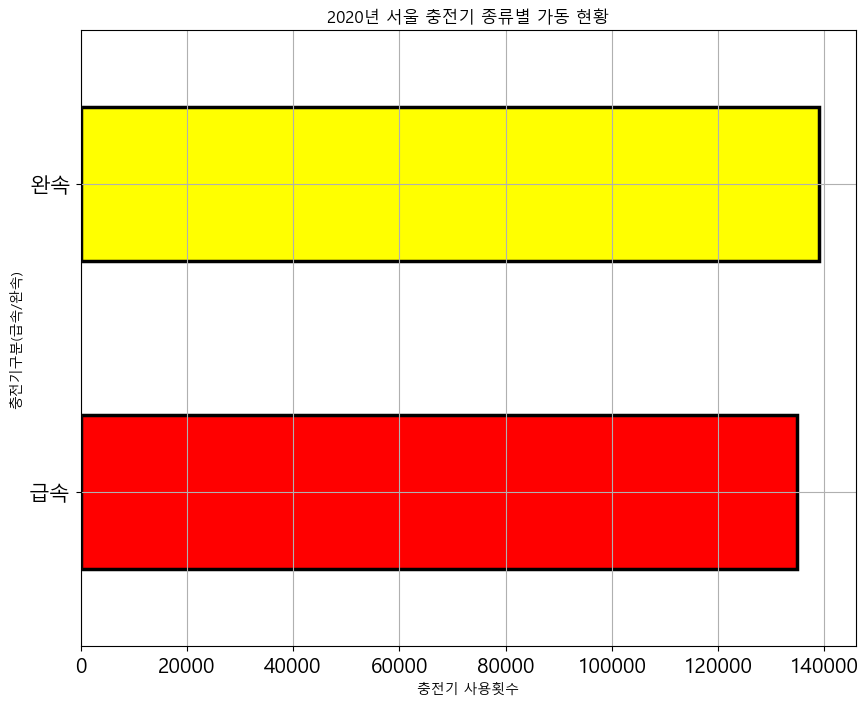

In [33]:
# 2020년도 제주도 전기차 충전소(급속/완속) 사용 빈도 시각화

chargetypecountjeju20_df = pd.value_counts(chardatajeju_df['충전기구분'].values, sort=True, ascending = True)
chargetypecountjeju20_df.plot.barh()
chargetypecountjeju20_df.plot.barh(grid=True, color = ['red', 'yellow'], edgecolor = 'black', linewidth = 2.5, figsize=(10,8), fontsize=15)
plt.title('2020년 서울 충전기 종류별 가동 현황')
plt.xlabel('충전기 사용횟수')
plt.ylabel('충전기구분(급속/완속)')